In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys
from IPython.core.pylabtools import figsize

In [2]:
Delta = 2*60*24
steps = 100

In [3]:
#Number of daily simulation
BlockPerDay=2*60*24 #blocks per day
BlocksPerYear=BlockPerDay*365
BlockRate=BlocksPerYear

In [4]:
#Initialize Variables Market volatile
X1=np.zeros(steps) #Exchange Rate
X1[0]=1/49.8906263347343 # 1/49.8906263347343
IAs1=np.zeros(steps)  #Interest accumulated supply
IAs1[0]=0 #
TS1=np.zeros(steps)  #Total Supply
TS1[0]= 20 # 1326781 #Total ETH
TB1=np.zeros(steps)  #Total Borrows ETH
TB1[0]= 2 # 67190 #Total Borrows ETH
IAb1=np.zeros(steps)  #Interest accumulated borrow
IAb1[0]=0 #
TR1=np.zeros(steps) #Total Reserves
TR1[0]= 2 # 326 #Total Reserves ETH
rateB1=np.zeros(steps) #Block Rate
rateB1[0]=0 #
rateS1=np.zeros(steps) #Block Rate
rateS1[0]=0 
SF1=np.zeros(steps) #Subsidy fund
SF1[0]=0
difSF1=np.zeros(steps) #Subsidy fund decrease
difSF1[0]=0

In [5]:
#Initialize Variables Market Stable 1
X2=np.zeros(steps) #Exchange Rate
X2[0]=1/45.3677485000342 # 1/45.3677485000342
IAs2=np.zeros(steps)  #Interest accumulated supply
IAs2[0]=0 #
TS2=np.zeros(steps)  #Total Supply
TS2[0]=1000  # 3615296781 #Total ETH
TB2=np.zeros(steps)  #Total Borrows ETH
TB2[0]=800 # 2200559758 #Total Borrows ETH
IAb2=np.zeros(steps)  #Interest accumulated borrow
IAb2[0]=0 #
TR2=np.zeros(steps) #Total Reserves
TR2[0]=0 # 6199487 #Total Reserves ETH
rateB2=np.zeros(steps) #Block Rate
rateB2[0]=0 #
rateS2=np.zeros(steps) #Block Rate
rateS2[0]=0 #

In [6]:
#Initialize Variables Market Stable 2
X3=np.zeros(steps) #Exchange Rate
X3[0]=1/46.5881718870464 # 1/46.5881718870464
IAs3=np.zeros(steps)  #Interest accumulated supply
IAs3[0]=0 #
TS3=np.zeros(steps)  #Total Supply
TS3[0]=1000 # 3424342312 #Total ETH
TB3=np.zeros(steps)  #Total Borrows ETH
TB3[0]=800 # 2552616954 #Total Borrows ETH
IAb3=np.zeros(steps)  #Interest accumulated borrow
IAb3[0]=0 #
TR3=np.zeros(steps) #Total Reserves
TR3[0]=0 # 12980202 #Total Reserves ETH
rateB3=np.zeros(steps) #Block Rate
rateB3[0]=0 #
rateS3=np.zeros(steps) #Block Rate
rateS3[0]=0 #

In [7]:
#Initialize Variables Market Stable 4 (copy market stable 2)
X4=np.zeros(steps) #Exchange Rate
X4[0]=1/46.5881718870464 # 1/46.5881718870464
IAs4=np.zeros(steps)  #Interest accumulated supply
IAs4[0]=0 #
TS4=np.zeros(steps)  #Total Supply
TS4[0]=1000 # 3424342312 #Total ETH
TB4=np.zeros(steps)  #Total Borrows ETH
TB4[0]=800 # 2552616954 #Total Borrows ETH
IAb4=np.zeros(steps)  #Interest accumulated borrow
IAb4[0]=0 #
TR4=np.zeros(steps) #Total Reserves
TR4[0]=0 # 12980202 #Total Reserves ETH
rateB4=np.zeros(steps) #Block Rate
rateB4[0]=0 #
rateS4=np.zeros(steps) #Block Rate
rateS4[0]=0 #

In [8]:
#Initialize Variables Market Stable 3 (copy market stable 1)
X5=np.zeros(steps) #Exchange Rate
X5[0]=1/45.3677485000342 # 1/45.3677485000342
IAs5=np.zeros(steps)  #Interest accumulated supply
IAs5[0]=0 #
TS5=np.zeros(steps)  #Total Supply
TS5[0]=1000  # 3615296781 #Total ETH
TB5=np.zeros(steps)  #Total Borrows ETH
TB5[0]=800 # 2200559758 #Total Borrows ETH
IAb5=np.zeros(steps)  #Interest accumulated borrow
IAb5[0]=0 #
TR5=np.zeros(steps) #Total Reserves
TR5[0]=0 # 6199487 #Total Reserves ETH
rateB5=np.zeros(steps) #Block Rate
rateB5[0]=0 #
rateS5=np.zeros(steps) #Block Rate
rateS5[0]=0 #

In [9]:
#Initial parameters and interest rate model
#I=np.array([1]) #Index
rF1=0.4
rF2=0.4
rF3=0.4
rF4=0.4
rF5=0.4

In [10]:
#Utilization
def urate(S,B):
    if S>0:
        ur=B/S
    else:
        ur=0  
    return ur

Ut1=np.zeros(steps) #Utilization Rate
Ut1[0]=TB1[0]/TS1[0]
Ut2=np.zeros(steps) #Utilization Rate
Ut2[0]=TB2[0]/TS2[0]
Ut3=np.zeros(steps) #Utilization Rate
Ut3[0]=TB3[0]/TS3[0]
Ut4=np.zeros(steps) #Utilization Rate
Ut4[0]=TB4[0]/TS4[0]
Ut5=np.zeros(steps) #Utilization Rate
Ut5[0]=TB5[0]/TS5[0]

print('Utilization rate volatile',Ut1[0])
print('Utilization rate stable1',Ut2[0])
print('Utilization rate stable2',Ut3[0])
print('Utilization rate stable3',Ut4[0])
print('Utilization rate stable4',Ut5[0])

Utilization rate volatile 0.1
Utilization rate stable1 0.8
Utilization rate stable2 0.8
Utilization rate stable3 0.8
Utilization rate stable4 0.8


In [11]:
def sr(u):
    return u*br2(u)*(1-rF2)

def br2(u):
    if u<=0.85:
        rt=0.08+0.018*u
    else:
        rt=0.08+0.018*0.85+0.8*(u-0.85)
    return rt

def br3(u):
    if u<=0.8:
        rt=0.1+0.015*u
    else:
        rt=0.01+0.015*0.8+1*(u-0.8)
    return rt

def br4(u):
    if u<=0.8:
        rt=0.1+0.015*u
    else:
        rt=0.01+0.015*0.8+1*(u-0.8)
    return rt

def br5(u):
    if u<=0.85:
        rt=0.08+0.018*u
    else:
        rt=0.08+0.018*0.85+0.8*(u-0.85)
    return rt

Br2=np.zeros(steps); Br3=np.zeros(steps); Br4=np.zeros(steps); Br5=np.zeros(steps)
Br2[0]=br2(TB2[0]/TS2[0]); Br3[0]=br3(TB3[0]/TS3[0]); Br4[0]=br4(TB4[0]/TS4[0]); Br5[0]=br5(TB5[0]/TS5[0])
Sr2=np.zeros(steps); Sr3=np.zeros(steps); Sr4=np.zeros(steps); Sr5=np.zeros(steps)
Sr2[0]=sr(TB2[0]/TS2[0]); Sr3[0]=sr(TB3[0]/TS3[0]); Sr4[0]=sr(TB4[0]/TS4[0]); Sr5[0]=sr(TB5[0]/TS5[0])

print('Borrow Rate stable 1 & 4',Br2[0])
print('Supply Rate stable 1 & 4',Sr2[0])
print('Borrow Rate stable 2 & 3',Br3[0])
print('Supply Rate stable 2 & 3',Sr3[0])

Borrow Rate stable 1 & 4 0.0944
Supply Rate stable 1 & 4 0.045312
Borrow Rate stable 2 & 3 0.112
Supply Rate stable 2 & 3 0.045312


In [12]:
#Functions interest rate model
def br1(u):
    return 0.08+0.04*u
def sr1(u):
    return 0.05+0.02*u

Br1=np.zeros(steps) #Borrow Rate
Br1[0]=br1(TB1[0]/TS1[0])
Sr1=np.zeros(steps) #Supply Rate
Sr1[0]=sr1(TB1[0]/TS1[0])

print('Borrow Rate volatile',Br1[0])
print('Supply Rate volatile',Sr1[0])

Borrow Rate volatile 0.084
Supply Rate volatile 0.052000000000000005


In [13]:
#Simulate 1st steps

# a = % de prestamos pagados
# b = % de cash tomado en prestamos
# c = pagos realizados
# d = supply realizados

def sim_agg1(T,a=0.4,b=0.03,c=-3,d=5,MC=200):
    Nio = np.zeros(T)
    Mio = np.zeros(T)
    tsa = TS1[0]
    for t in range(1, T):
        newNio = np.random.uniform(low = -TB1[t-1]*a, high = max(0, TS1[t-1]-TB1[t-1]+TR1[t-1])*b) # borrows ETH
        newMio = np.random.uniform(low = c, high = d) #supply ETH
        if MC != 0:
            if tsa + newMio < MC:
                tsa += newMio
            else:
                newMio = 0
        Nio[t] = newNio
        Mio[t] = newMio
        #Interest rate model 1
        Ut1[t]=urate(TS1[t-1],TB1[t-1])  
        Br1[t]=br1(Ut1[t])
        Sr1[t]=sr1(Ut1[t])
        rateB1[t]=Br1[t]/BlockRate # RatePerBlock
        rateS1[t]=Sr1[t]/BlockRate
        IAb1[t]=IAb1[t-1]+TB1[t-1]*rateB1[t]*Delta
        TB1[t]=TB1[t-1]+IAb1[t]+Nio[t]
        TR1[t]=0 # TR1[t-1]+TB1[t-1]*rateB1[t]*Delta
        IAs1[t]=IAs1[t-1]+TS1[t-1]*rateS1[t]*Delta
        TS1[t]=TS1[t-1]+IAs1[t]+Mio[t]
        SF1[t] = SF1[t-1] - max(0, IAs1[t] - IAb1[t])
        difSF1[t] = max(0, IAs1[t] - IAb1[t])        
        
    itm1=pd.DataFrame({'utilization':Ut1,'borrow rate':Br1,'Block brate':rateB1,'supply rate': Sr1,'Block srate': rateS1})
    mAgg1=pd.DataFrame({'N.Borrow(ETH)':Nio,'T.Borrow(ETH)':TB1,'IA.Borrow(ETH)':IAb1,'N.Supply(ETH)':Mio,'T.Supply(ETH)':TS1,
                        'IA.Supply(ETH)':IAs1,'T.Reserves(ETH)': TR1,'Cash(ETH)':(TS1-TB1+TR1),'Subsidy(ETH)': SF1,
                        'DecreaseSubsidy(ETH)': difSF1})
    return itm1,mAgg1

def sim_agg2(T,a=0.1,b=0.1,c=-3,d=5):
    Nio2 = np.zeros(T); Nio3 = np.zeros(T); Nio4 = np.zeros(T); Nio5 = np.zeros(T)
    Mio2 = np.zeros(T); Mio3 = np.zeros(T); Mio4 = np.zeros(T); Mio5 = np.zeros(T)
    tsa2 = TS2[0]; tsa3 = TS3[0]; tsa4 = TS4[0]; tsa5 = TS5[0]
    for t in range(1, T):
        # Borrow
        newNio2 = np.random.uniform(low = -TB2[t-1]*a, high = max(0, TS2[t-1]-TB2[t-1]+TR2[t-1])*b)
        newNio3 = np.random.uniform(low = -TB3[t-1]*a, high = max(0, TS3[t-1]-TB3[t-1]+TR3[t-1])*b)
        newNio4 = np.random.uniform(low = -TB4[t-1]*a, high = max(0, TS4[t-1]-TB4[t-1]+TR4[t-1])*b)
        newNio5 = np.random.uniform(low = -TB5[t-1]*a, high = max(0, TS5[t-1]-TB5[t-1]+TR5[t-1])*b)
        # Supply
        newMio2 = np.random.uniform(low = c, high = d) 
        newMio3 = np.random.uniform(low = c, high = d) 
        newMio4 = np.random.uniform(low = c, high = d) 
        newMio5 = np.random.uniform(low = c, high = d) 
        Nio2[t] = newNio2; Nio3[t] = newNio3; Nio4[t] = newNio4; Nio5[t] = newNio5
        Mio2[t] = newMio2; Mio3[t] = newMio3; Mio4[t] = newMio4; Mio5[t] = newMio5
        #Interest rate model (stable markets)
        # Utilization
        Ut2[t]=urate(TS2[t-1],TB2[t-1]);Ut3[t]=urate(TS3[t-1],TB3[t-1])
        Ut4[t]=urate(TS4[t-1],TB4[t-1]);Ut5[t]=urate(TS5[t-1],TB5[t-1])
        # Rates
        Br2[t]=br2(Ut2[t]); Br3[t]=br3(Ut3[t]); Br4[t]=br4(Ut4[t]); Br5[t]=br5(Ut5[t])
        Sr2[t]=sr(Ut2[t]); Sr3[t]=sr(Ut3[t]); Sr4[t]=sr(Ut4[t]); Sr5[t]=sr(Ut5[t])
        # Rates per block
        rateB2[t]=Br2[t]/BlockRate; rateB3[t]=Br3[t]/BlockRate; rateB4[t]=Br4[t]/BlockRate; rateB5[t]=Br5[t]/BlockRate 
        rateS2[t]=Sr2[t]/BlockRate; rateS3[t]=Sr3[t]/BlockRate; rateS4[t]=Sr4[t]/BlockRate; rateS5[t]=Sr5[t]/BlockRate
        # Accrued interest (Borrow)
        IAb2[t]=IAb2[t-1]+TB2[t-1]*rateB2[t]*Delta
        IAb3[t]=IAb3[t-1]+TB3[t-1]*rateB3[t]*Delta
        IAb4[t]=IAb4[t-1]+TB4[t-1]*rateB4[t]*Delta
        IAb5[t]=IAb5[t-1]+TB5[t-1]*rateB5[t]*Delta
        # Accrued interest (supply)
        IAs2[t]=IAs2[t-1]+TS2[t-1]*rateS2[t]*Delta
        IAs3[t]=IAs3[t-1]+TS3[t-1]*rateS3[t]*Delta
        IAs4[t]=IAs4[t-1]+TS4[t-1]*rateS4[t]*Delta
        IAs5[t]=IAs5[t-1]+TS5[t-1]*rateS5[t]*Delta
        # metrics
        TB2[t]=TB2[t-1]+IAb2[t]+Nio2[t]; TB3[t]=TB3[t-1]+IAb3[t]+Nio3[t]
        TB4[t]=TB4[t-1]+IAb4[t]+Nio4[t]; TB5[t]=TB5[t-1]+IAb5[t]+Nio5[t]
        TR2[t]=TR2[t-1]+TB2[t-1]*rateB2[t]*Delta*rF2; TR3[t]=TR3[t-1]+TB3[t-1]*rateB3[t]*Delta*rF3
        TR4[t]=TR4[t-1]+TB4[t-1]*rateB4[t]*Delta*rF4; TR5[t]=TR5[t-1]+TB5[t-1]*rateB5[t]*Delta*rF5
        TS2[t]=TS2[t-1]+IAs2[t]+Mio2[t]; TS3[t]=TS3[t-1]+IAs3[t]+Mio3[t]
        TS4[t]=TS4[t-1]+IAs4[t]+Mio4[t]; TS5[t]=TS5[t-1]+IAs5[t]+Mio5[t]
        
    itm2=pd.DataFrame({'utilization':Ut2,'borrow rate':Br2,'Block brate':rateB2,'supply rate': Sr2,'Block srate': rateS2})
    mAgg2=pd.DataFrame({'N.Borrow(ETH)':Nio2,'T.Borrow(ETH)':TB2,'IA.Borrow(ETH)':IAb2,'N.Supply(ETH)':Mio2,'T.Supply(ETH)':TS2,
                        'IA.Supply(ETH)':IAs2,'T.Reserves(ETH)': TR2,'Cash(ETH)':(TS2-TB2+TR2)})
    itm3=pd.DataFrame({'utilization':Ut3,'borrow rate':Br3,'Block brate':rateB3,'supply rate': Sr3,'Block srate': rateS3})
    mAgg3=pd.DataFrame({'N.Borrow(ETH)':Nio3,'T.Borrow(ETH)':TB3,'IA.Borrow(ETH)':IAb3,'N.Supply(ETH)':Mio3,'T.Supply(ETH)':TS3,
                        'IA.Supply(ETH)':IAs3,'T.Reserves(ETH)': TR3,'Cash(ETH)':(TS3-TB3+TR3)})
    itm4=pd.DataFrame({'utilization':Ut4,'borrow rate':Br4,'Block brate':rateB4,'supply rate': Sr4,'Block srate': rateS4})
    mAgg4=pd.DataFrame({'N.Borrow(ETH)':Nio4,'T.Borrow(ETH)':TB4,'IA.Borrow(ETH)':IAb4,'N.Supply(ETH)':Mio4,'T.Supply(ETH)':TS4,
                        'IA.Supply(ETH)':IAs4,'T.Reserves(ETH)': TR4,'Cash(ETH)':(TS4-TB4+TR4)})
    itm5=pd.DataFrame({'utilization':Ut5,'borrow rate':Br5,'Block brate':rateB5,'supply rate': Sr5,'Block srate': rateS5})
    mAgg5=pd.DataFrame({'N.Borrow(ETH)':Nio5,'T.Borrow(ETH)':TB5,'IA.Borrow(ETH)':IAb5,'N.Supply(ETH)':Mio5,'T.Supply(ETH)':TS5,
                        'IA.Supply(ETH)':IAs5,'T.Reserves(ETH)': TR5,'Cash(ETH)':(TS5-TB5+TR5)})
    return itm2,mAgg2,itm3,mAgg3,itm4,mAgg4,itm5,mAgg5

In [31]:
(itm1,mAgg1)=sim_agg1(steps,MC=10000)

In [32]:
pd.set_option("display.precision", 10)
itm1.tail()

,utilization,borrow rate,Block brate,supply rate,Block srate
95,0.0707140560,0.0828285622,0.0000000788,0.0514142811,0.0000000489
96,0.0819053534,0.0832762141,0.0000000792,0.0516381071,0.0000000491
97,0.0894062512,0.0835762500,0.0000000795,0.0517881250,0.0000000493
98,0.1024454967,0.0840978199,0.0000000800,0.0520489099,0.0000000495
99,0.1285531458,0.0851421258,0.0000000810,0.0525710629,0.0000000500


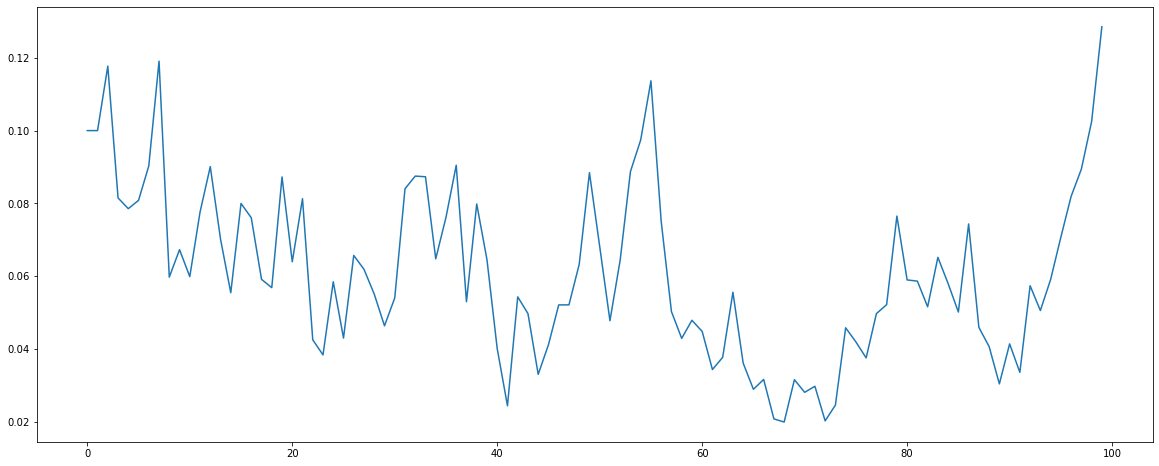

In [33]:
plt.plot(itm1["utilization"])

In [34]:
mAgg1.tail()

,N.Borrow(ETH),T.Borrow(ETH),IA.Borrow(ETH),N.Supply(ETH),T.Supply(ETH),IA.Supply(ETH),T.Reserves(ETH),Cash(ETH),Subsidy(ETH),DecreaseSubsidy(ETH)
95,1.2743629747,10.4114387956,0.0685274982,-1.9262246646,127.1154859322,0.7991965025,0.0,116.7040471366,-24.1980306278,0.7306690043
96,1.2332896939,11.7156313993,0.0709029098,3.1055023112,131.0381683160,0.8171800726,0.0,119.3225369167,-24.9443077906,0.7462771628
97,1.6515184706,13.4407353784,0.0735855085,-0.6750515590,131.1988892160,0.8357724590,0.0,117.7581538376,-25.7064947411,0.7621869505
98,3.1120341364,16.6294518358,0.0766823209,-2.6947949879,129.3585756163,0.8544813882,0.0,112.7291237805,-26.4842938083,0.7777990673
99,-2.6377167426,14.0722965015,0.0805614083,4.1029391143,134.3346276745,0.8731129439,0.0,120.2623311730,-27.2768453439,0.7925515356


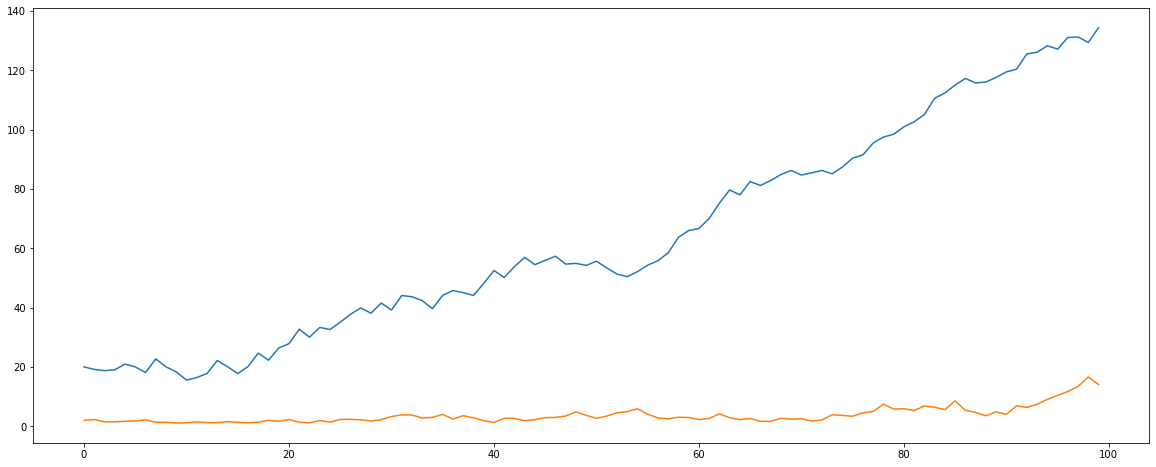

In [35]:
plt.plot(mAgg1["T.Supply(ETH)"])
plt.plot(mAgg1["T.Borrow(ETH)"])

In [19]:
# 5958616.902840733
sum(mAgg1["T.Supply(ETH)"])/len(mAgg1["T.Supply(ETH)"])/0.05*35000

26898600.80961443

In [20]:
sum(mAgg1["T.Supply(ETH)"])/len(mAgg1["T.Supply(ETH)"])*35000

1344930.0404807217

In [21]:
(itm2,mAgg2,itm3,mAgg3,itm4,mAgg4,itm5,mAgg5)=sim_agg2(steps,a=0.5,b=0.95,c=-50,d=45000)

In [22]:
sum(mAgg2["T.Supply(ETH)"])/len(mAgg2["T.Supply(ETH)"])

1289261.9169965095

In [23]:
5571355.893673553/(sum(mAgg1["T.Supply(ETH)"])/len(mAgg1["T.Supply(ETH)"])/0.05*35000)

0.20712437546871101

In [24]:
sum(mAgg3["T.Supply(ETH)"])/len(mAgg3["T.Supply(ETH)"])

1155017.173077777

In [25]:
sum(mAgg5["T.Supply(ETH)"])/len(mAgg5["T.Supply(ETH)"])

1187642.7901392388

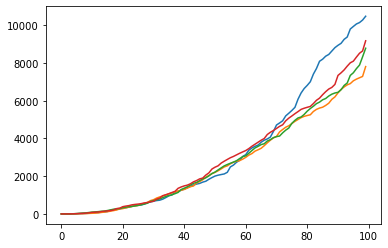

In [26]:
plt.plot(mAgg2["T.Reserves(ETH)"])
plt.plot(mAgg3["T.Reserves(ETH)"])
plt.plot(mAgg4["T.Reserves(ETH)"])
plt.plot(mAgg5["T.Reserves(ETH)"])

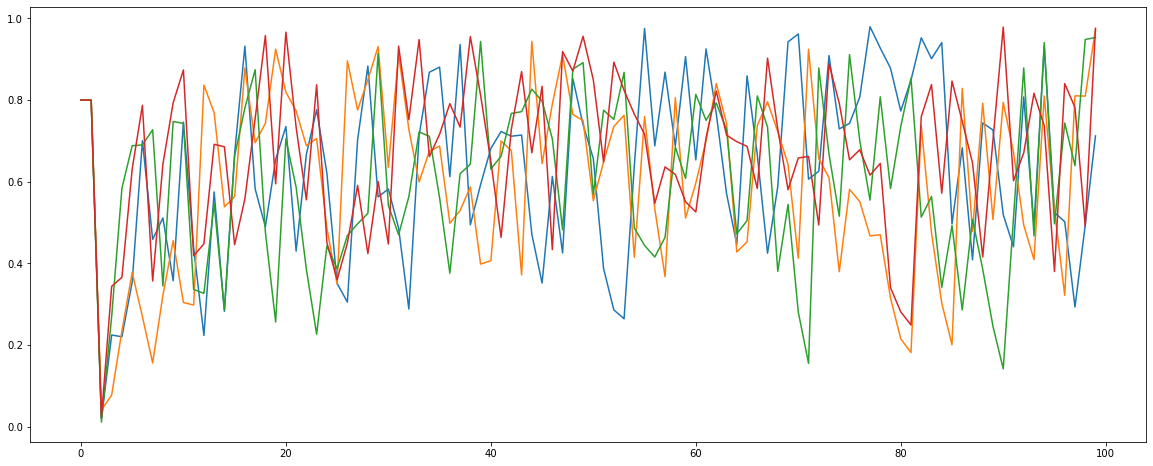

In [27]:
figsize(20,8)
plt.plot(itm2["utilization"])
plt.plot(itm3["utilization"])
plt.plot(itm4["utilization"])
plt.plot(itm5["utilization"])

In [28]:
totalReserves = []
for v in range(len(mAgg2["T.Reserves(ETH)"])):
    TR = mAgg2["T.Reserves(ETH)"][v]+mAgg3["T.Reserves(ETH)"][v]+mAgg4["T.Reserves(ETH)"][v]+mAgg5["T.Reserves(ETH)"][v]
    totalReserves.append(TR)

In [29]:
BTCPrice = 35000
sub = mAgg1["Subsidy(ETH)"][steps-1]*BTCPrice
print("Lo que se debe pagar de subsidio",sub)
print("Total acumulado en reservas",totalReserves[-1])

Lo que se debe pagar de subsidio -730759.706658877
Total acumulado en reservas 36224.49134839543


In [30]:
29793084.51420366*0.20

5958616.902840733